In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

In [2]:
data = pd.read_csv('traindata.csv')

F_onewayResult(statistic=76.18729763354631, pvalue=2.4702320364374126e-48)

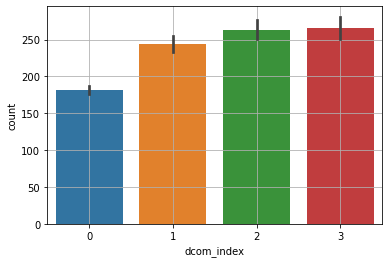

In [7]:
temp=data['temperature']
humi=data['humidity']
data['discomfort']=temp*0.81 + 0.01*humi*(temp*0.99 - 14.3) + 46.3 # 불쾌지수 계산식
data['dcom_index']= pd.cut(data['discomfort'], bins=[0, 68, 75, 80, 100], labels=['0', '1', '2', '3'])

feature='dcom_index' #불쾌지수

sobad= data.loc[data[feature]=='3', target]
bad= data.loc[data[feature]=='2', target]
normal= data.loc[data[feature]=='1', target]
good= data.loc[data[feature]=='0', target]
display(spst.f_oneway(good, normal, bad, sobad))

sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

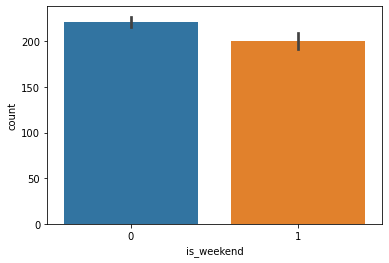

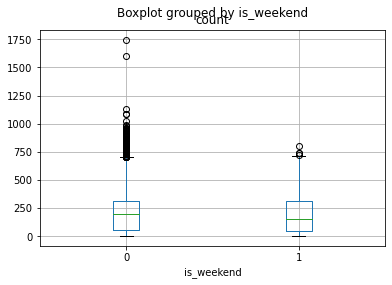

Ttest_indResult(statistic=3.8974110319479296, pvalue=9.831763048935543e-05)

In [5]:
data['date'] = pd.to_datetime(data['date']) # datetime 자료형으로 변환
data['weekday'] = data['date'].dt.weekday # 0 : 월요일 ~ 6 : 일요일
data['is_weekend'] = np.where(data['weekday'] > 4, 1, 0) # 주말이면 1, 평일이면 0 으로 범주화
feature = 'is_weekend'
target = 'count'

s0 = data.loc[data[feature] == 0, 'count'] # 평일 데이터
s1 = data.loc[data[feature] == 1, 'count'] # 주말 데이터
sns.barplot(x=feature, y =target, data=data)
data.boxplot(target, feature)
plt.show()

spst.ttest_ind(s0, s1)